<a id=top-page></a>
# `pykitPIV` demo: Transform images

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size="3"><strong>Table of contents:</strong></font>
<br>
<ol>
    <li><a href="#upload">Upload the saved datasets</a></li>
</ol>
<p></p>
</div>
<br>

***

In [374]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import cmcrameri.cm as cmc
from pykitPIV import Image
from pykitPIV import Postprocess

<a id=upload></a>
***

## Upload the saved dataset

[Go to the top](#top-page)

The standalone import of previously saved PIV image pairs and the associated targets can be performed following this minimal example:

In [2]:
image = Image()

In [3]:
images_tensor_dic = image.upload_from_h5(filename='pykitPIV-tutorial-PIV-pairs.h5')
images_tensor = images_tensor_dic['I']
images_tensor = images_tensor[:,:,:,:]
images_tensor.shape

(2, 2, 240, 500)

In [4]:
postprocess = Postprocess(images_tensor)

In [5]:
postprocess.image_pair

True

In [6]:
log_transformed_images_tensor = postprocess.log_transform_images(addition=10000)

In [7]:
log_transformed_images_tensor.shape

(2, 2, 240, 500)

In [8]:
postprocess.processed_image_tensor.shape

(2, 2, 240, 500)

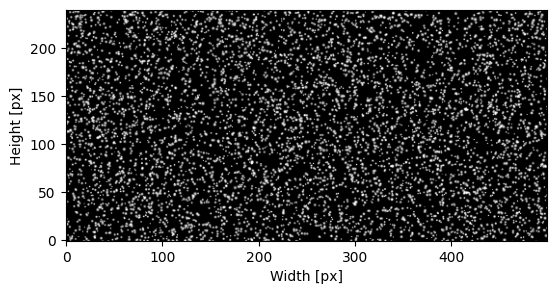

In [13]:
postprocess.plot(1,
                 instance=1,
                 xlabel='Width [px]',
                 ylabel='Height [px]',
                 cmap='Greys_r',
                 figsize=(10,3));

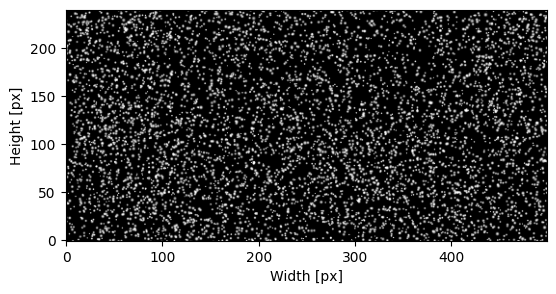

In [14]:
postprocess.plot(1,
                 instance=2,
                 xlabel='Width [px]',
                 ylabel='Height [px]',
                 cmap='Greys_r',
                 figsize=(10,3));

In [587]:
n_points_h = 100
n_points_w = 100

In [628]:
h = np.linspace(-0.4, 0.4, n_points_h)

In [629]:
w = np.linspace(-0.4, 0.4, n_points_w)

In [663]:
m = 50
n = 50
r = 100

In [672]:
(grid_w, grid_h) = np.meshgrid(w, h)

poly = np.sin(m*grid_w) * np.cos(n*grid_h) * np.sin(r*(grid_w + grid_h))

images_tensor = poly[None,:,:]

In [673]:
images_tensor.shape

(1, 100, 100)

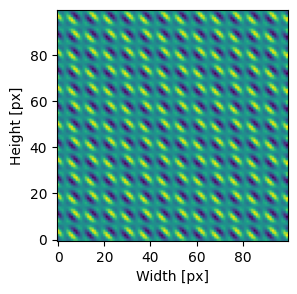

In [679]:
postprocess = Postprocess(images_tensor)
log_transformed_images_tensor = postprocess.log_transform_images(addition=10000)
postprocess.plot(0,
                 instance=2,
                 xlabel='Width [px]',
                 ylabel='Height [px]',
                 cmap='viridis',
                 figsize=(10,3));

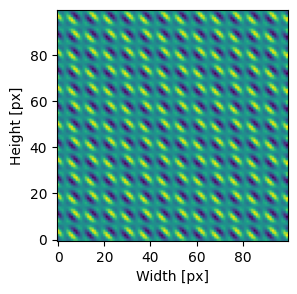

In [630]:
def chebyshev_polynomial(h, w, order):

    (grid_w, grid_h) = np.meshgrid(w, h)

    Un_h = np.zeros((len(h), 1))
    Un_w = np.zeros((1, len(w)))
    sin_product = np.sin(order * (grid_w + grid_h))

    for i in range(0,len(h)):

        product = 1
        for k in range(0, order):
            product *= (h[i] - np.cos((k * np.pi)) / (order + 1))

        Un_h[i,0] = 2**order * product

    for i in range(0,len(w)):

        product = 1
        for k in range(0, order):
            product *= (w[i] - np.cos((k * np.pi)) / (order + 1))
            
        Un_w[0,i] = 2**order * product

    return np.dot(Un_h, Un_w) #* sin_product

In [631]:
poly = chebyshev_polynomial(h, w, order=5)

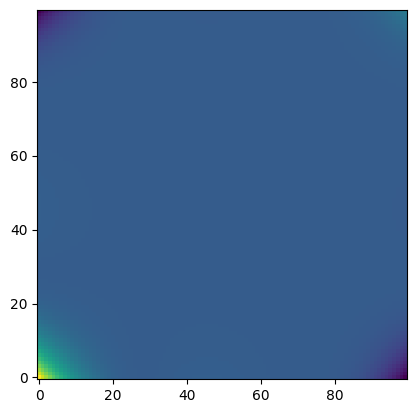

In [637]:
plt.imshow(poly, origin='lower')

***